# Wine Dataset

This notebook contains an analysis of the popular wine dataset on the UCI Machine Learning Repository. The goal is to classify different types of wines based on chemical attributes.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import urllib.request
desc = urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names").read(20000).decode('utf=8')
print(desc)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [16]:
attribute_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [17]:
raw_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=attribute_names)

In [18]:
raw_data.head()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alkalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavonoids                      178 non-null float64
Nonflavonoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


The data has no missing values. Let's create training and test sets.

In [23]:
from sklearn.model_selection import train_test_split

X = raw_data.iloc[:,1:]
y = raw_data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

## Feature Scaling

Because all features are continuous, scaling is considerably easier than usual.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=attribute_names[1:])
scaled_X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=attribute_names[1:])

In [45]:
scaled_X_test.head()

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
170,-0.978029,0.546926,-0.141142,-0.151222,-0.133572,-1.723082,-1.623245,0.311443,-1.507616,0.227903,-1.273702,-1.082544,-0.713406
25,0.088765,-0.272889,3.359176,1.587719,1.882781,0.547120,0.678386,0.881763,0.577917,-0.596955,0.785077,0.837909,0.336631
91,-1.229040,-0.724624,0.247782,0.718248,-0.853698,-1.394067,-0.824505,1.126187,0.069678,-0.588362,0.434647,0.066924,-0.910288
78,-0.814873,-1.159628,-1.580162,-1.368481,2.746932,-0.653784,-0.193921,-0.095930,2.050059,-0.674285,0.478451,-0.409685,0.074122
83,0.088765,1.241259,-0.141142,0.863160,-0.925710,-1.065052,-0.467175,2.022405,0.052152,-0.072826,-0.485233,-0.830222,-0.697000


## EDA

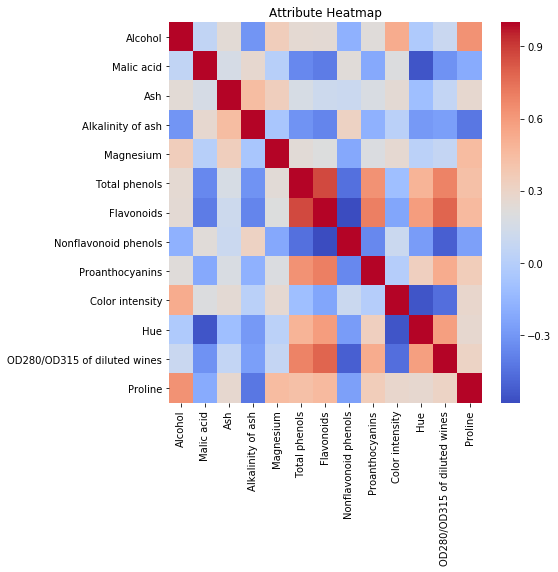

In [46]:
corrplot = plt.figure(figsize=(7,7))
corrplotax = sns.heatmap(scaled_X_train.corr(), cmap='coolwarm')
corrplotax.set_title('Attribute Heatmap');

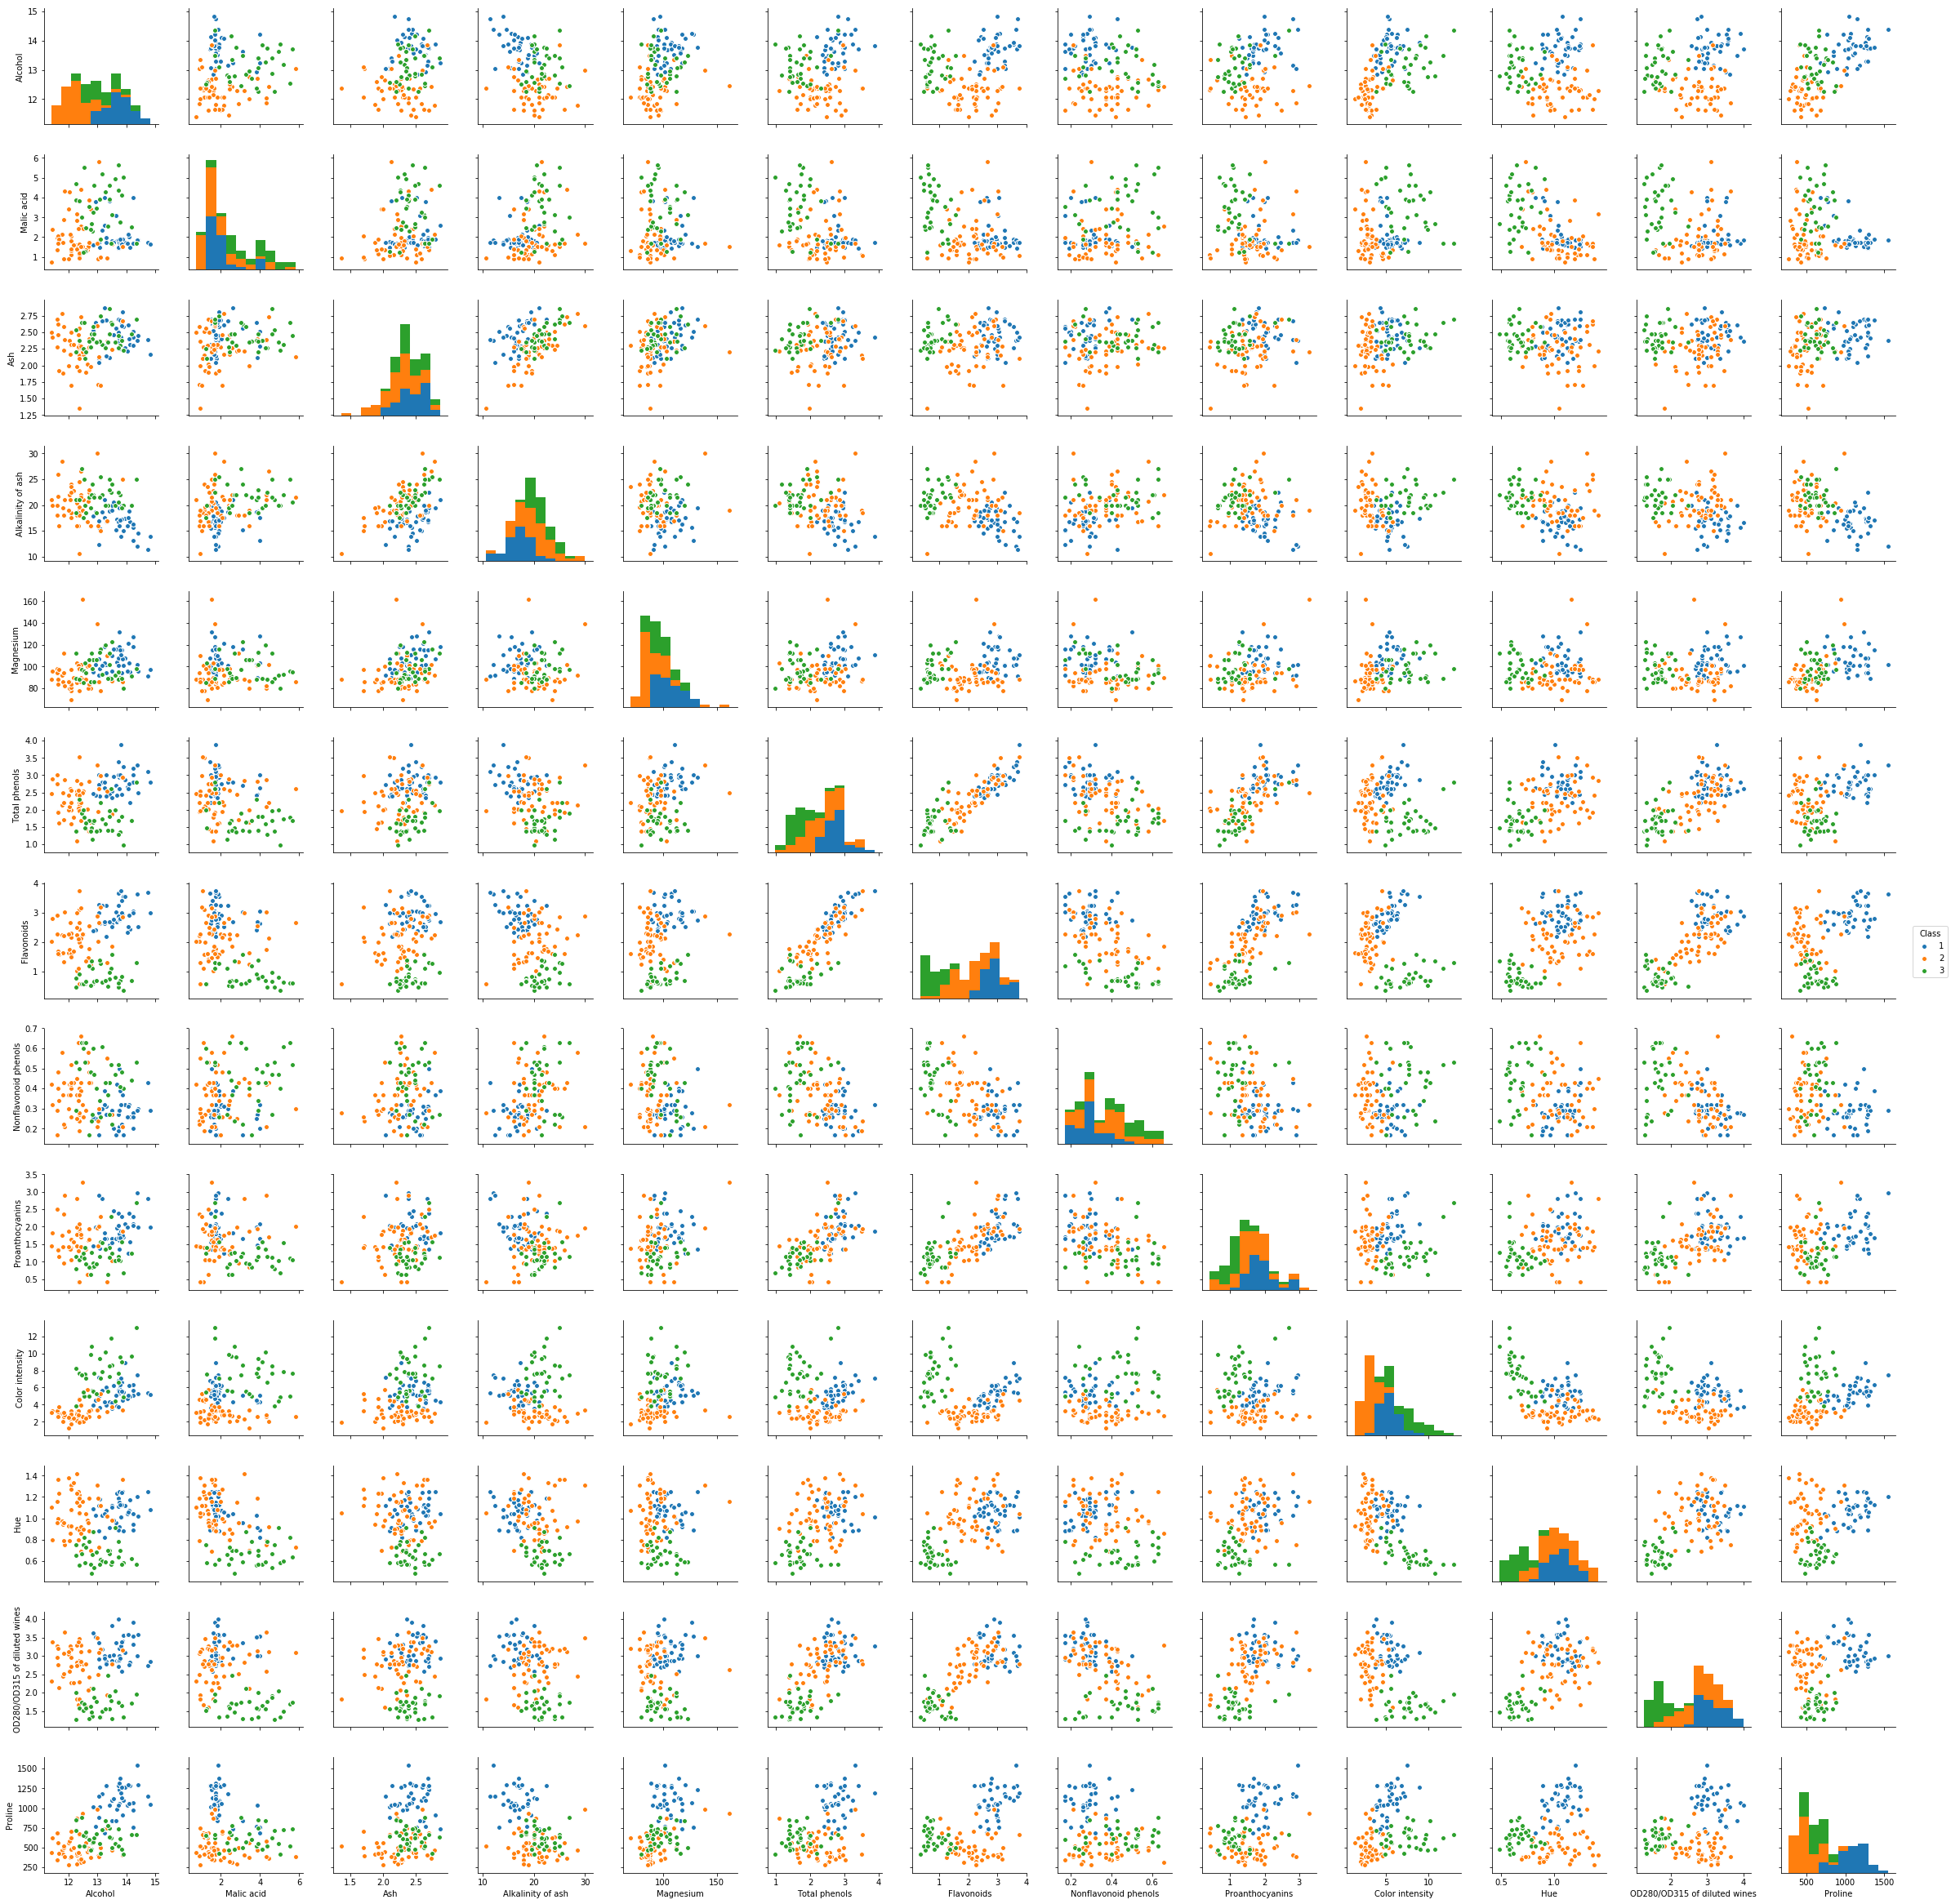

In [54]:
sns.pairplot(raw_data.iloc[X_train.index], hue='Class', vars=attribute_names[1:])

Given our lack of knowledge of what the classes mean specifically (they're supposed to relate to the origins of the wines, but these origins are not mentioned by name), and thus our inability to link certain attributes with certain classes based on stock knowledge (i.e., we can't use knowledge of, say, general alcohol levels of wines produced from a certain location to help us determine the classes of the wines in our data), we proceed immediately to modeling.

## Modeling

We'll use an artificial neural network (multi-layer perceptron) to accurately predict wine class based on the given attributes.

We'll use stochastic gradient descent as our solver, with one hidden layer composed of 8 neurons (the average of the number of input and output neurons). We'll use the default learning rate of 0.001 (along with other default momentum parameters) and 850 epochs (iterations) to give the algorithm ample opportunity to converge on optimal neuron weights.

In [102]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier(solver='sgd', hidden_layer_sizes=(int(np.mean([len(X.columns), y_train.nunique()]),),), max_iter=850)

In [103]:
ANN.fit(scaled_X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=850, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [104]:
ANN.score(scaled_X_train, y_train)

0.99193548387096775

With a training accuracy of 99.19%, we can move on to evaluating the model.

## Model Evaluation

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

Let's test the score on our holdout set.

In [108]:
ANN.score(scaled_X_test, y_test)

0.94444444444444442

Our accuracy remains high even on the holdout set.

In [119]:
print(classification_report(y_test, ANN.predict(scaled_X_test), target_names=['Wine 1','Wine 2', 'Wine 3']))

             precision    recall  f1-score   support

     Wine 1       1.00      0.95      0.97        19
     Wine 2       0.94      0.89      0.92        19
     Wine 3       0.89      1.00      0.94        16

avg / total       0.95      0.94      0.94        54



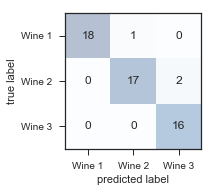

In [154]:
confusion = plot_confusion_matrix(confusion_matrix(y_test, ANN.predict(scaled_X_test)))
confusion[1].set_xticklabels([0,'Wine 1', 'Wine 2', 'Wine 3']);
confusion[1].set_yticklabels([0,'Wine 1', 'Wine 2', 'Wine 3']);

In [171]:
from sklearn.metrics import roc_auc_score, roc_curve

n_classes = y_test.nunique()
y_score = ANN.predict_proba(scaled_X_test)
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_train)
binarized_y_test = lb.transform(y_test)

Area under the curve for class 0: 1.0
Area under the curve for class 1: 0.995488721805
Area under the curve for class 2: 0.998355263158
Micro-average ROC curve: 0.9965706447187929
Macro-average ROC curve: 0.9982814767181111


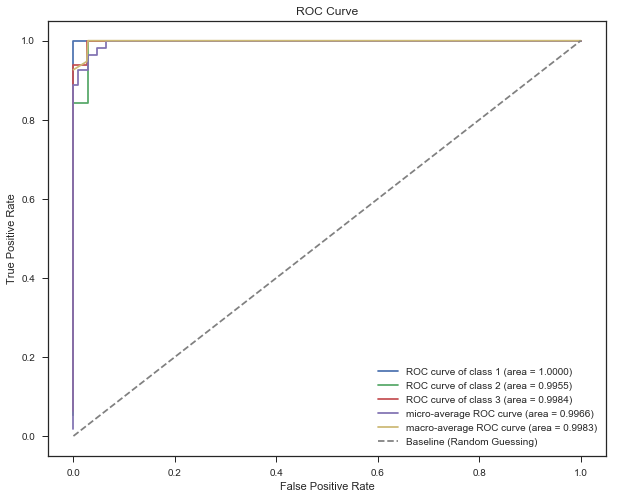

In [184]:
# Code based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import auc
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(binarized_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this point
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# My code for plotting

roc_fig, roc_ax = plt.subplots(figsize=(10,8))

for i in range(n_classes):
    roc_ax.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'.format(i+1, roc_auc[i]))
    print('Area under the curve for class {0}:'.format(i), roc_auc[i])

roc_ax.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.4f})'.format(roc_auc["micro"]),)
roc_ax.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:0.4f})'.format(roc_auc["macro"]))
roc_ax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)')

roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('ROC Curve')
roc_ax.legend();

print('Micro-average ROC curve: {0}'.format(roc_auc["micro"]))
print('Macro-average ROC curve: {0}'.format(roc_auc["macro"]))

## Scratch Work

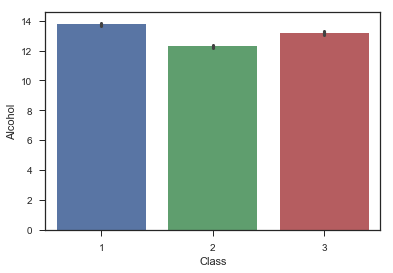

In [155]:
sns.set(style='ticks')
sns.barplot(y='Alcohol', x='Class', data=raw_data.iloc[X.index]);

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])